<a href="https://colab.research.google.com/github/smbonilla/learningPyTorch/blob/main/03_pyTorchComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision 

## 0. Computer vision libraries 

* `torchvision` - base domain library
* `torchvision.datasets` - get datasets and data loading function for compter vision
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with ML model 
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - created a python iterable over a dataset

In [ ]:
# import packages
import torch
from torch import nn 

import torchvision 
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor 

import matplotlib.pyplot as plt 

print(torchvision.__version__)


0.13.1+cu113


## 1. Getting a dataset

the dataset we will be using: FashionMNIST from `torchvision.datasets`

imagenet - an image database organized by nouns depicting millions of images

In [ ]:
# Setup training data
trainData = datasets.FashionMNIST(root="data", # where to download data to?
                                   train=True, # do we want the training dataset?
                                   download=True, # do we want to download
                                   transform=ToTensor(), # how do we want to transform data
                                   target_transform=None) # how do we want to transform labels/targets

testData = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

In [ ]:
# see the first bit of data

image, label = trainData[0]

classNames = trainData.classes
classNames

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
classToIDX = trainData.class_to_idx
classToIDX

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# Check the shape of our image
print(f"Image Shape: {image.shape}") # color channel, height, width (only 1 cuz B/W)
print(f"Image Label: {classNames[label]}") 

Image Shape: torch.Size([1, 28, 28])
Image Label: Ankle boot


Image shape: torch.Size([1, 28, 28])


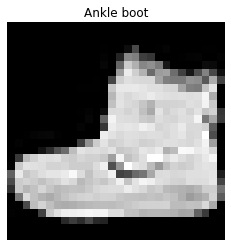

In [ ]:
# visualize our data
image, label = trainData[0]

print(f"Image shape: {image.shape}")

# color channel needs to be last or gone
plt.imshow(image.squeeze(), cmap="gray");
plt.title(classNames[label]);
plt.axis(False);


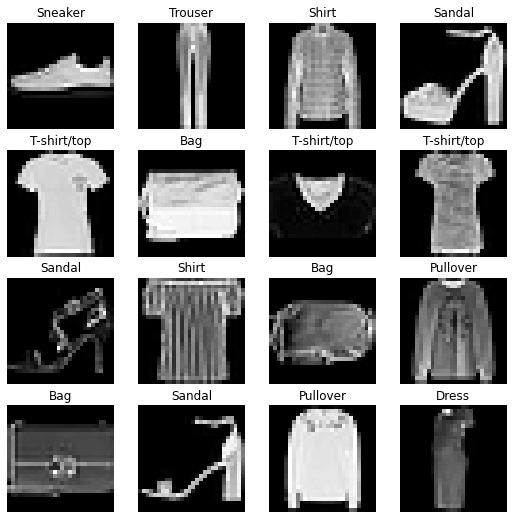

In [ ]:
# plot more images
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows,cols = 4,4

for i in range(1,rows*cols+1):
  
  randomIDX = torch.randint(0,len(trainData), size=[1]).item()
  
  image, label = trainData[randomIDX]

  fig.add_subplot(rows,cols,i);
  plt.imshow(image.squeeze(),cmap="gray");
  plt.title(classNames[label]);
  plt.axis(False);